<a href="https://colab.research.google.com/github/prajeshtejani/Bird_Species/blob/main/BirdSpieces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = 'Bird Speciees Dataset.zip'

with ZipFile('Bird Speciees Dataset.zip', 'r') as zip:
  zip.extractall()

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from keras.preprocessing import image
import cv2
import os

In [159]:
dir = 'Bird Speciees Dataset'
root_dir = os.listdir(dir)
Image_list , Label_list = [] , []

In [160]:
from posix import listdir
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    data = cv2.imread(image_path)
    data = image.img_to_array(data)
    Image_list.append(data)
    Label_list.append(directory)

In [161]:
pd.DataFrame(Label_list).value_counts()

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [162]:
Image_list[0].shape
Label_list = np.array(Label_list)
Label_list.shape

(811,)

In [184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Image_list,Label_list,test_size = 0.2,random_state=0)

In [185]:
x_train = np.array(x_train,dtype = np.float16)/255.0
x_test = np.array(x_test,dtype = np.float16)/255.0
x_train = x_train.reshape(-1,224,224,3)
x_test = x_test.reshape(-1,224,224,3)

In [186]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=0)

In [187]:
cnn = keras.models.Sequential()

In [188]:
from keras.layers import Dropout
cnn.add(keras.layers.Conv2D(filters = 32,kernel_size=3,activation = 'relu',input_shape =(224,224,3)))
cnn.add(keras.layers.MaxPool2D(pool_size = 2,strides = 2))
cnn.add(Dropout(0.25))

In [189]:
cnn.add(keras.layers.Conv2D(filters = 32,kernel_size=3,activation = 'relu'))
cnn.add(keras.layers.MaxPool2D(pool_size = 2,strides = 2))
cnn.add(Dropout(0.25))

In [190]:
cnn.add(keras.layers.Conv2D(filters = 16,kernel_size=2,activation = 'relu'))
cnn.add(keras.layers.MaxPool2D(pool_size = 2,strides = 2))
cnn.add(Dropout(0.25))

In [191]:
cnn.add(keras.layers.Flatten())

In [192]:
from tensorflow.keras.optimizers import Adam
cnn.add(keras.layers.Dense(units = 32,activation= 'relu'))
cnn.add(keras.layers.Dense(units = 6,activation= 'softmax',)) #for_output_layer

cnn.compile(optimizer =Adam(0.0005) ,loss ='categorical_crossentropy' ,metrics =['accuracy'] )
cnn.fit(x = x_train,  y= y_train,epochs = 50,batch_size = 128,validation_data=(x_val,y_val))

Epoch 1/50
5/5 [==============================] - 32s 6s/step - loss: 1.7892 - accuracy: 0.2144 - val_loss: 1.7463 - val_accuracy: 0.2923
Epoch 2/50
5/5 [==============================] - 37s 8s/step - loss: 1.6998 - accuracy: 0.3053 - val_loss: 1.6756 - val_accuracy: 0.3538
Epoch 3/50
5/5 [==============================] - 33s 7s/step - loss: 1.6107 - accuracy: 0.3242 - val_loss: 1.6231 - val_accuracy: 0.3692
Epoch 4/50
5/5 [==============================] - 31s 6s/step - loss: 1.5429 - accuracy: 0.3636 - val_loss: 1.5515 - val_accuracy: 0.4000
Epoch 5/50
5/5 [==============================] - 31s 6s/step - loss: 1.4387 - accuracy: 0.4014 - val_loss: 1.4889 - val_accuracy: 0.4615
Epoch 6/50
5/5 [==============================] - 31s 6s/step - loss: 1.3807 - accuracy: 0.4168 - val_loss: 1.4236 - val_accuracy: 0.4154
Epoch 7/50
5/5 [==============================] - 31s 6s/step - loss: 1.2780 - accuracy: 0.5232 - val_loss: 1.3501 - val_accuracy: 0.4923
Epoch 8/50
5/5 [==================

In [193]:
y_pred  = cnn.predict(x_test)
score = cnn.evaluate(x_test, y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

6/6 [==============================] - 2s 325ms/step - loss: 0.4992 - accuracy: 0.8589
Accuracy over the test set: 
  85.89 %


In [195]:
img = image.array_to_img(x_test[1])
labels = lb.classes_


# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels[np.argmax(y_test[1])])
print("Predicted : ",labels[np.argmax(y_pred[1])])


Originally :  BARN OWL
Predicted :  BARN OWL


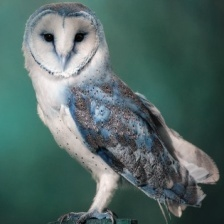

In [196]:
img